In [504]:
# this will help in making the Python code more structured automatically (good coding practice)
# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To perform statistical analysis
import scipy.stats as stats

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
)

In [505]:
df= pd.read_csv("StarHotelsGroup.csv")
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,3,0,0,3,Not Selected,0,Room_Type 1,277,2019,7,13,Online,0,0,0,89.10,2,Canceled


In [506]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [507]:
df["repeated_guest"].value_counts()

0    55522
1     1404
Name: repeated_guest, dtype: int64

In [508]:
df.duplicated().sum()

14350

In [509]:
df[df.duplicated()].count()

no_of_adults                            14350
no_of_children                          14350
no_of_weekend_nights                    14350
no_of_week_nights                       14350
type_of_meal_plan                       14350
required_car_parking_space              14350
room_type_reserved                      14350
lead_time                               14350
arrival_year                            14350
arrival_month                           14350
arrival_date                            14350
market_segment_type                     14350
repeated_guest                          14350
no_of_previous_cancellations            14350
no_of_previous_bookings_not_canceled    14350
avg_price_per_room                      14350
no_of_special_requests                  14350
booking_status                          14350
dtype: int64

In [510]:
df.drop_duplicates(inplace=True)

In [511]:
df.shape

(42576, 18)

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42576 entries, 0 to 56924
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          42576 non-null  int64  
 1   no_of_children                        42576 non-null  int64  
 2   no_of_weekend_nights                  42576 non-null  int64  
 3   no_of_week_nights                     42576 non-null  int64  
 4   type_of_meal_plan                     42576 non-null  object 
 5   required_car_parking_space            42576 non-null  int64  
 6   room_type_reserved                    42576 non-null  object 
 7   lead_time                             42576 non-null  int64  
 8   arrival_year                          42576 non-null  int64  
 9   arrival_month                         42576 non-null  int64  
 10  arrival_date                          42576 non-null  int64  
 11  market_segment_

In [269]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
no_of_adults,42576.0,NaN,NaN,NaN,1.916737,0.527524,0.0,2.0,2.0,2.0,4.0
no_of_children,42576.0,NaN,NaN,NaN,0.142146,0.45992,0.0,0.0,0.0,0.0,10.0
no_of_weekend_nights,42576.0,NaN,NaN,NaN,0.89527,0.887864,0.0,0.0,1.0,2.0,8.0
no_of_week_nights,42576.0,NaN,NaN,NaN,2.321167,1.519328,0.0,1.0,2.0,3.0,17.0
type_of_meal_plan,42576,4,Meal Plan 1,31863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
required_car_parking_space,42576.0,NaN,NaN,NaN,0.034362,0.18216,0.0,0.0,0.0,0.0,1.0
room_type_reserved,42576,7,Room_Type 1,29730,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lead_time,42576.0,NaN,NaN,NaN,77.315953,77.279616,0.0,16.0,53.0,118.0,521.0
arrival_year,42576.0,NaN,NaN,NaN,2018.297891,0.626126,2017.0,2018.0,2018.0,2019.0,2019.0
arrival_month,42576.0,NaN,NaN,NaN,6.365488,3.051924,1.0,4.0,6.0,9.0,12.0


#### Observations
1. No of adults typically were 2.
2. Most common not having children in the guestlist.
3. Most popular room_type was 1.
4. About 66% of the booking were not cancelled.

In [512]:
df.corr()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
no_of_adults,1.000000,-0.046768,0.088448,0.114718,-0.013978,0.157586,0.089816,0.001775,0.007152,-0.248220,-0.082402,-0.151376,0.352854,0.113269
no_of_children,-0.046768,1.000000,0.015463,0.022396,0.015151,0.036515,0.012982,0.013723,0.016474,-0.048387,-0.021786,-0.029038,0.344863,0.063826
no_of_weekend_nights,0.088448,0.015463,1.000000,0.234575,-0.054138,0.116011,0.025955,0.000370,0.000177,-0.096068,-0.036461,-0.048818,0.002365,0.006193
no_of_week_nights,0.114718,0.022396,0.234575,1.000000,-0.061178,0.209997,0.049051,-0.000454,-0.014510,-0.121374,-0.039081,-0.058228,0.024760,0.026863
required_car_parking_space,-0.013978,0.015151,-0.054138,-0.061178,1.000000,-0.046068,-0.046091,0.009392,0.000628,0.122087,0.035573,0.073901,0.026600,0.065491
lead_time,0.157586,0.036515,0.116011,0.209997,-0.046068,1.000000,0.210627,0.105792,0.036721,-0.154935,-0.060561,-0.088774,0.007367,0.024544
arrival_year,0.089816,0.012982,0.025955,0.049051,-0.046091,0.210627,1.000000,-0.471120,-0.003047,-0.015335,-0.005479,0.012817,0.239247,0.034592
arrival_month,0.001775,0.013723,0.000370,-0.000454,0.009392,0.105792,-0.471120,1.000000,-0.005708,-0.008168,-0.029231,-0.009322,0.065882,0.069201
arrival_date,0.007152,0.016474,0.000177,-0.014510,0.000628,0.036721,-0.003047,-0.005708,1.000000,-0.010135,-0.008540,-0.000034,0.016588,-0.001544
repeated_guest,-0.248220,-0.048387,-0.096068,-0.121374,0.122087,-0.154935,-0.015335,-0.008168,-0.010135,1.000000,0.397426,0.556413,-0.200056,0.002098


In [271]:
# Find out how many people got complementary booking 
df["df_price"]=df["avg_price_per_room"]<20
df_price.replace((True, False), (1, 0), inplace=True)
df1 = (df["df_price"]==1).value_counts()
df1


False    41845
True       731
Name: df_price, dtype: int64

In [272]:
 pd.crosstab(df.df_price,df.booking_status,margins=True)

booking_status,Canceled,Not_Canceled,All
df_price,,,
False,14469,27376,41845
True,18,713,731
All,14487,28089,42576


#### Observation
This indicates that out of total booking's 731 no. of guests have received a complemetary price on the hotel room. out of which 713 of them kept the booking. only 18 cancelled.

## Univariate Analysis

In [273]:
#dropping the column not needed as it was created for crosstab analysis.
df.drop("df_price",axis=1,inplace=True)

In [274]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

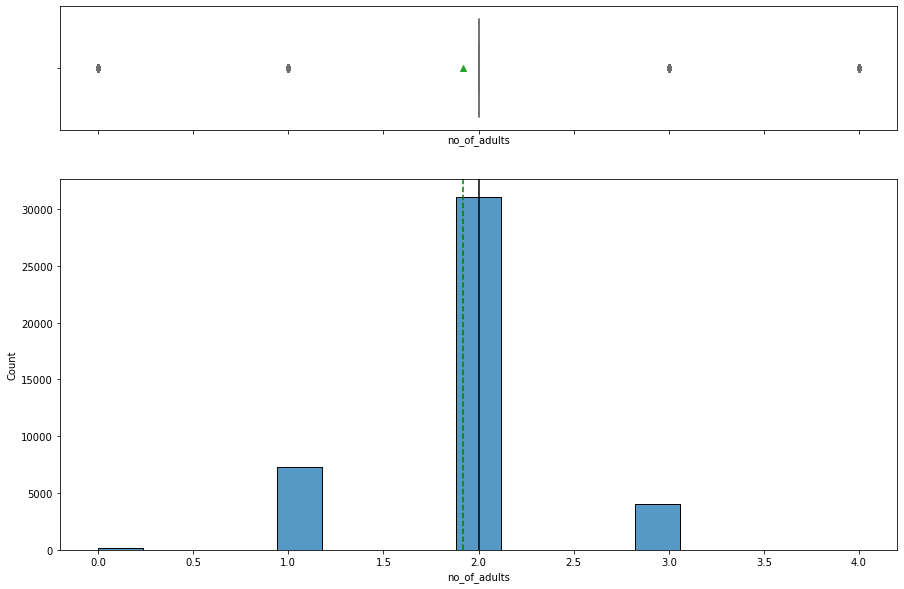

In [275]:
histogram_boxplot(df,"no_of_adults")

looks like the most common number of adults that were staying were 2.The median is 2 and mean is 1.9 or so. The less common is 1 adult and less than 2500 were 3 adults staying in the room. This data has some outliers.

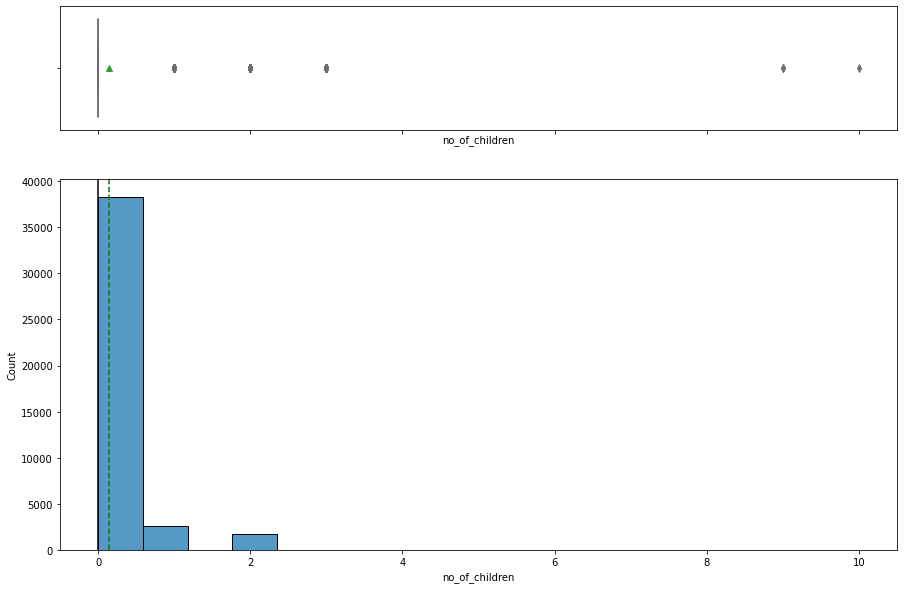

In [35]:
histogram_boxplot(df,"no_of_children")

In [ ]:
The most common scenario was the no. of childern were 0. so mean was a little more than 0. The median was 0.

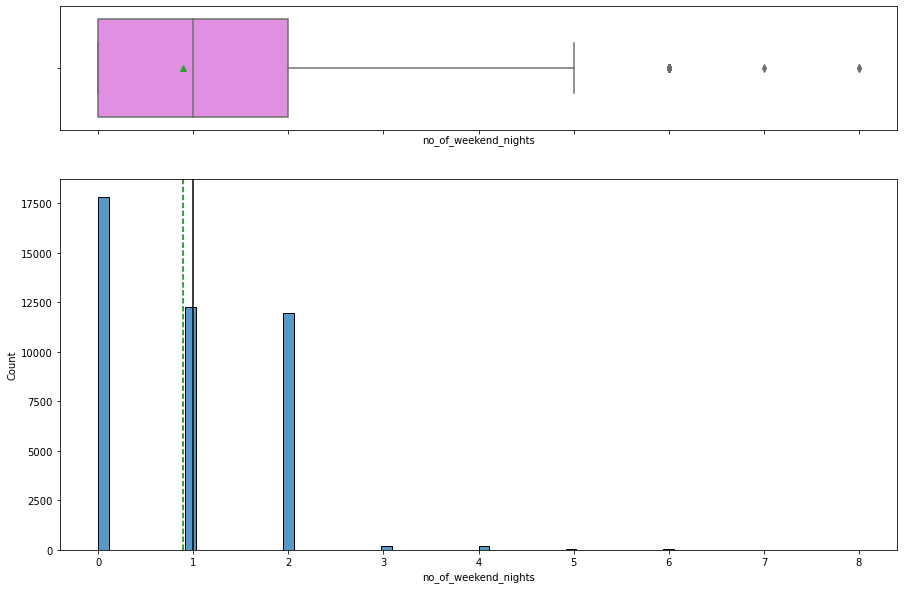

In [276]:
histogram_boxplot(df,"no_of_weekend_nights")

The most common scenario was the number of nights on the weekend was thypically 1. The median is 1. Mean is a little less than 1.we have a few outliers for the data.

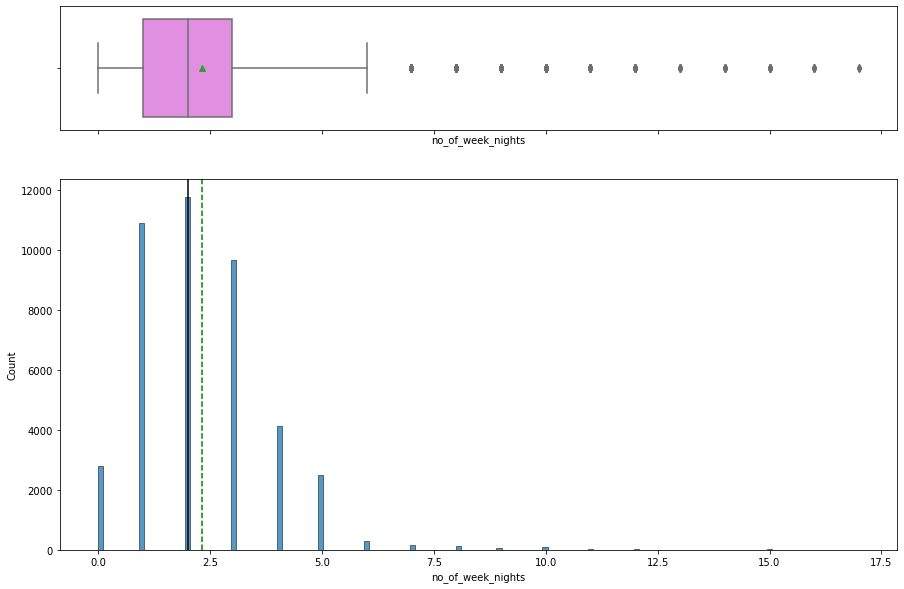

In [175]:
histogram_boxplot(df,"no_of_week_nights")

The most common scenario was the number of nights on the weekday was thypically 2.26. The median is 2.25. Mean is a little less than 2.5.we have a few outliers.

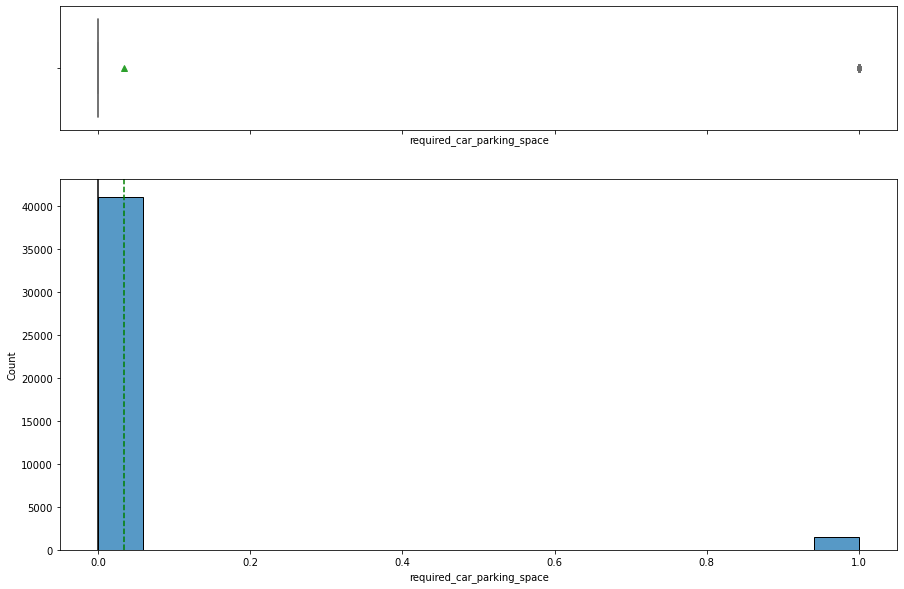

In [37]:
histogram_boxplot(df,"required_car_parking_space")

Most of the guests did not need parking space very few needed it.

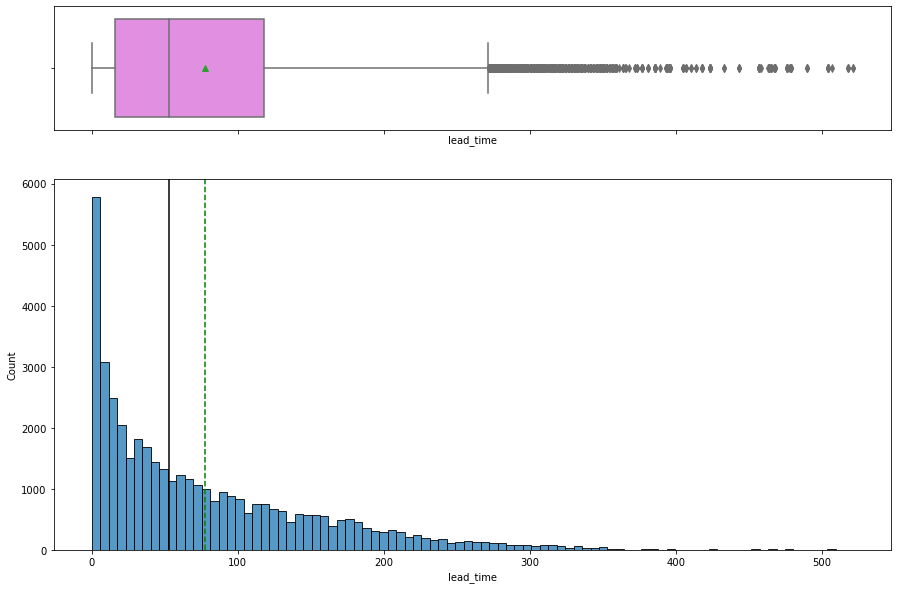

In [38]:
histogram_boxplot(df,"lead_time")

The boxplot shows outliers and so need to be treated. The most common lead_time was 0 days.

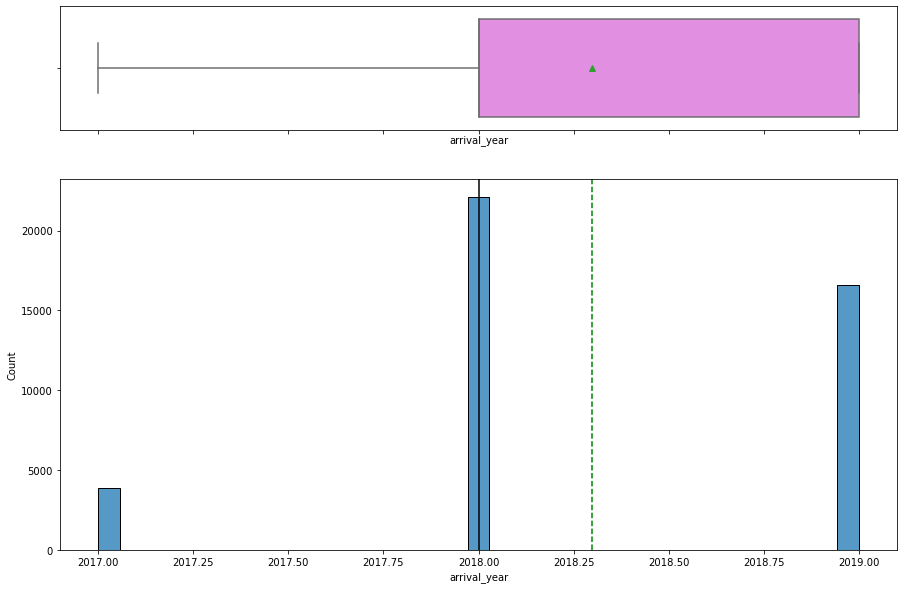

In [179]:
histogram_boxplot(df,"arrival_year")

The year 2018 showed high cancellations and 2017 was the lest no. of cancellations.

### What are the busiest months in the hotel?

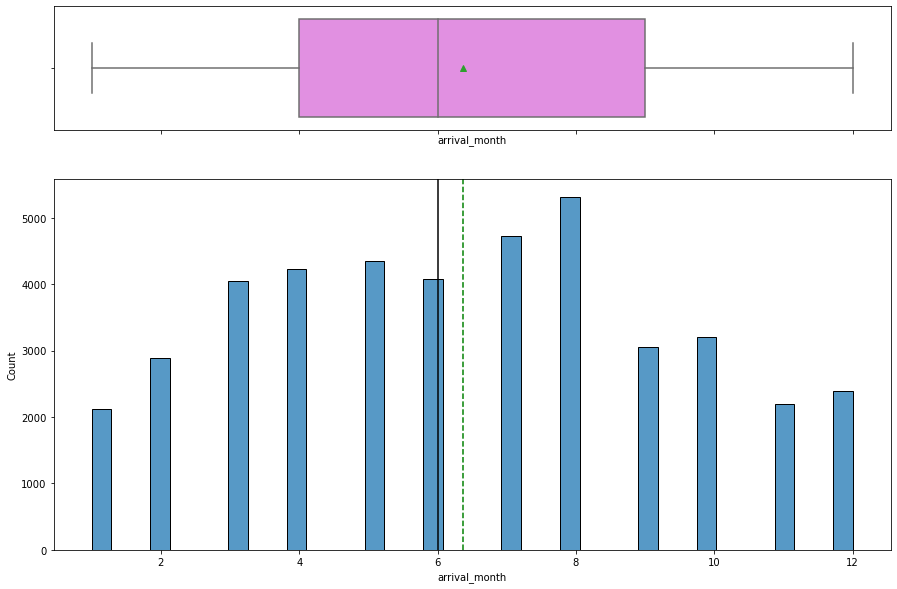

In [280]:
histogram_boxplot(df,"arrival_month")

#### The busiest month according to the histogram is month of 8 (August).

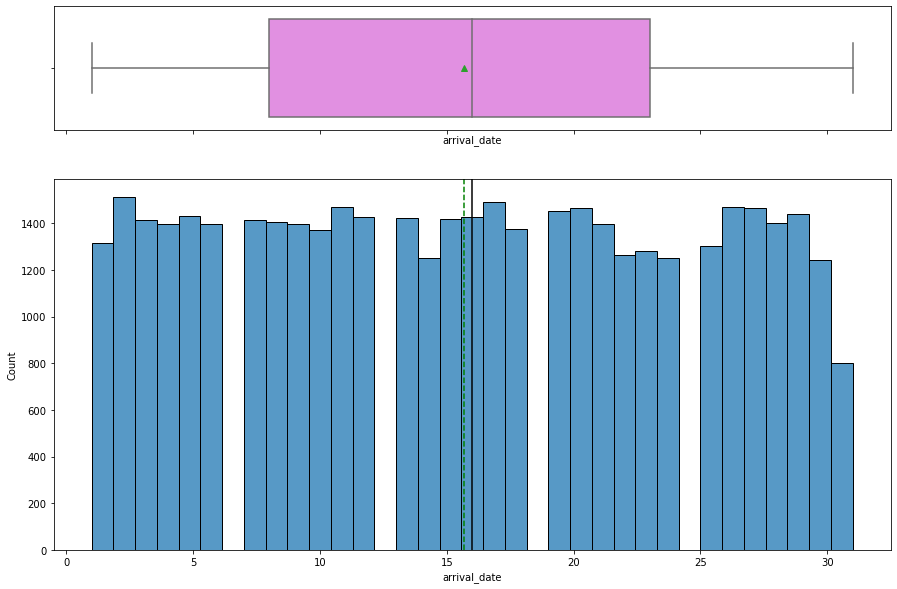

In [40]:
histogram_boxplot(df,"arrival_date")

The average arrival_date was the middle of the month.

### Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?

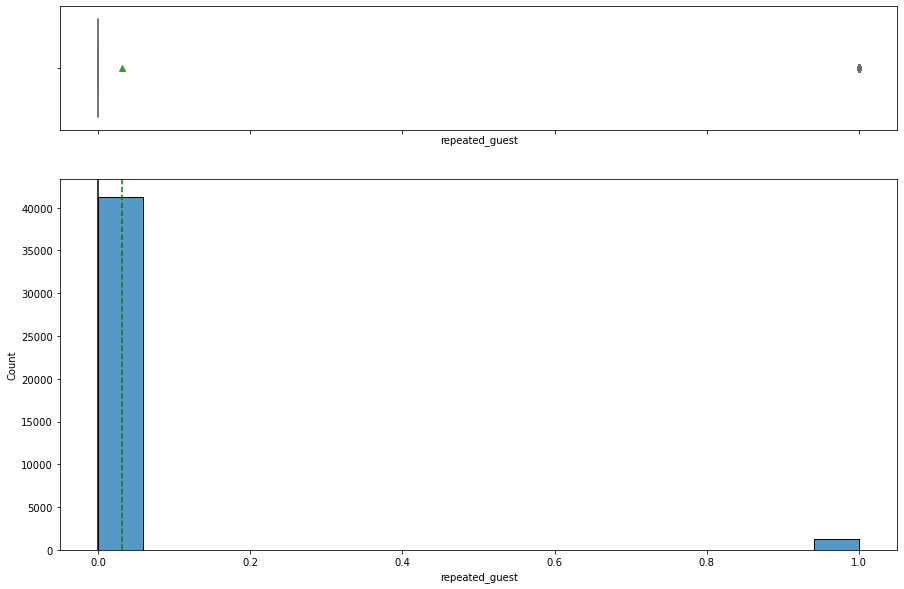

In [281]:
histogram_boxplot(df,"repeated_guest")

In [282]:
 pd.crosstab(df.repeated_guest,df.booking_status,margins=True)

booking_status,Canceled,Not_Canceled,All
repeated_guest,,,
0,14477,26784,41261
1,10,1305,1315
All,14487,28089,42576


#### The above crosstab shows us that 1305 of repeating guests kept the booking. only 10 of them cancelled. .76% so less than 1% cancel.

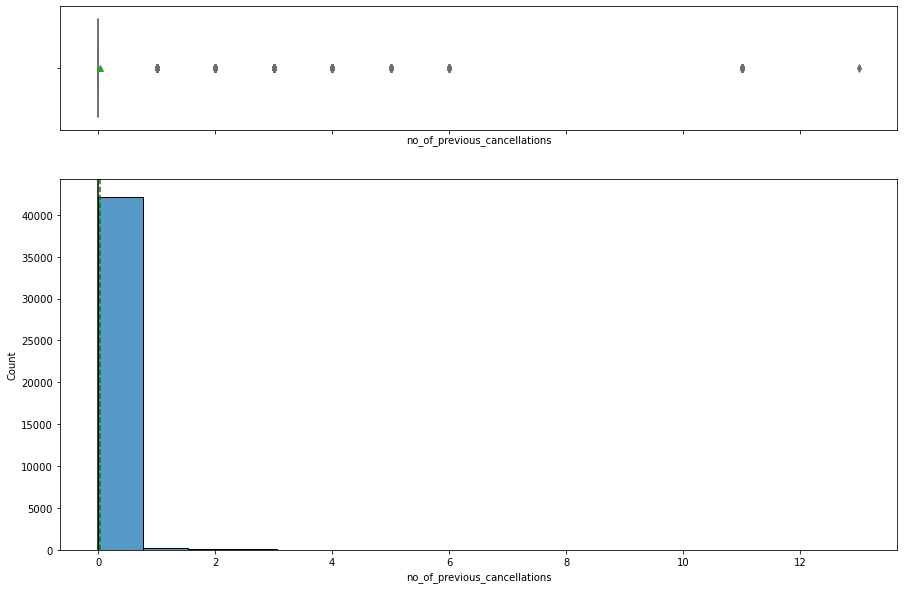

In [283]:
histogram_boxplot(df,"no_of_previous_cancellations")

Most of cancellation were first time guests.

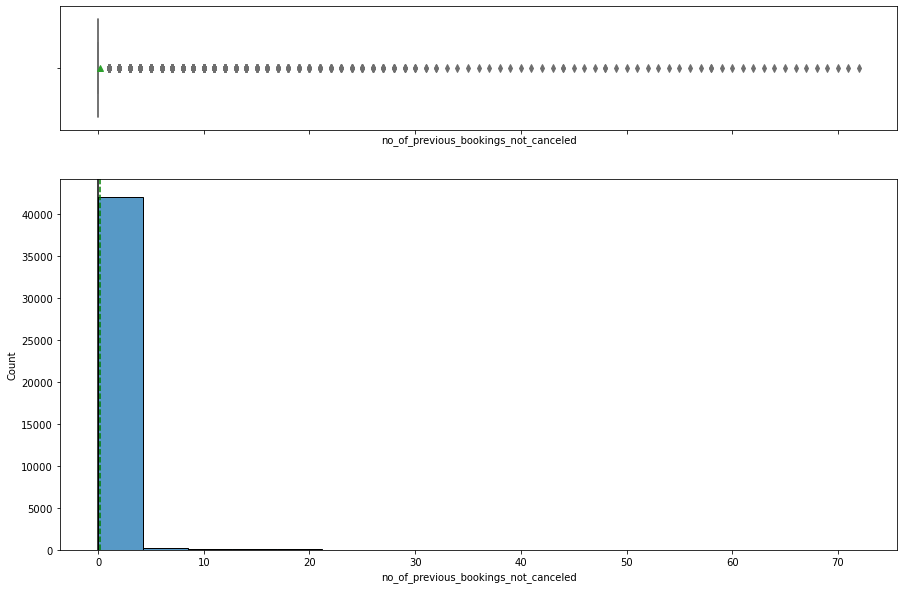

In [43]:
histogram_boxplot(df,"no_of_previous_bookings_not_canceled")

Most of the guests who have stayed at the hotel earlier did not cancel. some of them did.

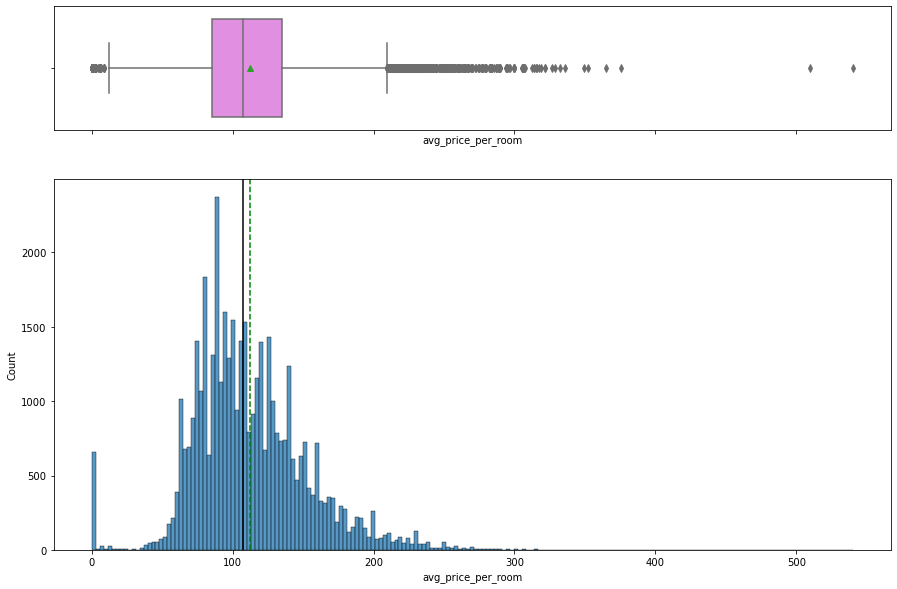

In [284]:
histogram_boxplot(df,"avg_price_per_room")

The avg_price_per_room is almost a normal distribution.Mean and median are quite close around 109.Since avg_price_per_room is a continous variable we need to treat the outliers.

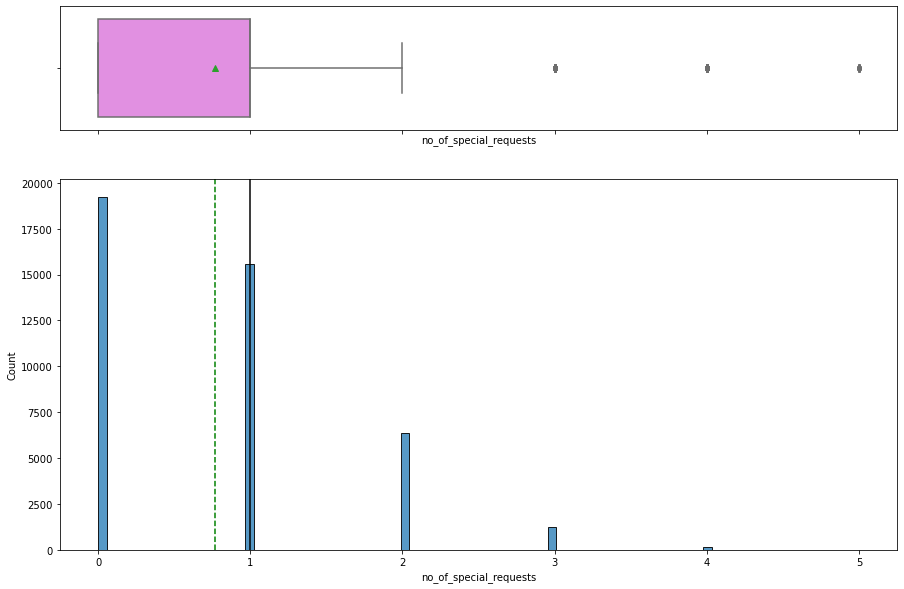

In [285]:
histogram_boxplot(df,"no_of_special_requests")

Many of the guests did not have special requests but a good number of guests had 1 or more than 1 special requests.

In [513]:
 df["booking_status"]= df["booking_status"].replace(['Canceled'],0)
 df["booking_status"]= df["booking_status"].replace(['Not_Canceled'],1)
 df.head(5)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,1
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,1
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,0
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,0
4,3,0,0,3,Not Selected,0,Room_Type 1,277,2019,7,13,Online,0,0,0,89.10,2,0


In [287]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

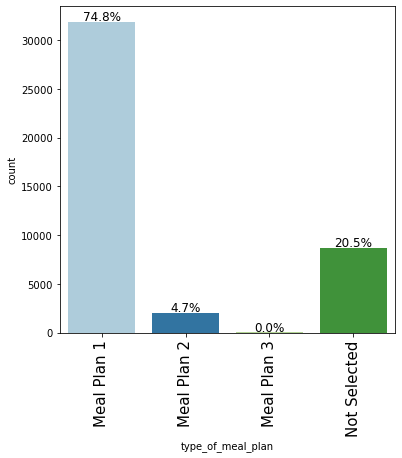

In [288]:
labeled_barplot(df,"type_of_meal_plan",perc=True)

It appears that 75% choose meal plan 1. 20% did not choose a meal plan. 5 % of them choose plan2.


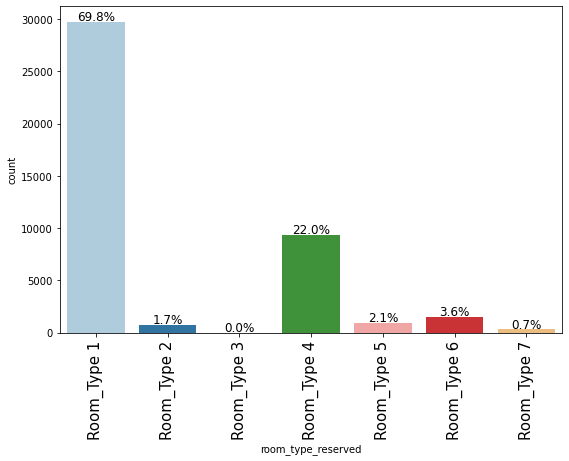

In [289]:
labeled_barplot(df,"room_type_reserved",perc=True)

The majority of the booking 75% of them choose room_type1 and 18 % of them choose room_type 4.

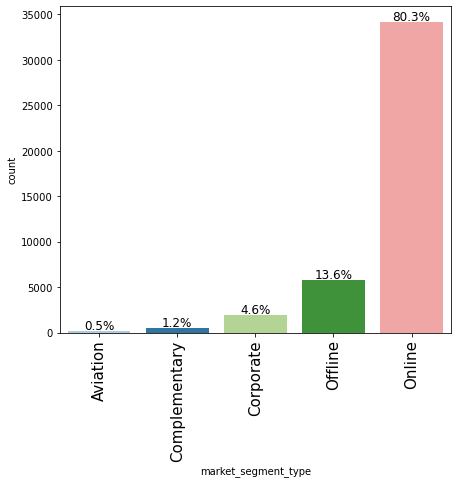

<Figure size 432x288 with 0 Axes>

In [501]:
labeled_barplot(df,"market_segment_type",perc=True)
import matplotlib.pyplot as plt
plt.savefig('market_segment_type.png')

### Which market segment do most of the guests come from?

#### 80% of the booking was done online and people calling in to do a booking was 13% and other segment was less than 5%.


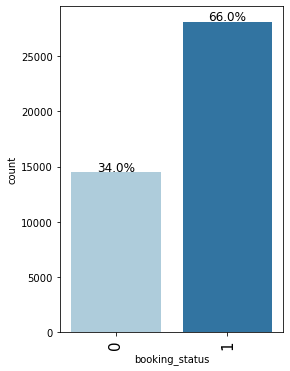

In [499]:
labeled_barplot(df,"booking_status",perc=True)

### What percentage of bookings are canceled?

### 66% of the people did not cancel the booking. whereas 34% of the people cancelled their booking.

## Bivariate Analysis

In [294]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

market_segment_type  Aviation  Complementary  Corporate  Offline  Online  \
booking_status                                                             
All                       195            496       1939     5777   34169   
1                         162            496       1772     4973   20686   
0                          33              0        167      804   13483   

market_segment_type    All  
booking_status              
All                  42576  
1                    28089  
0                    14487  
------------------------------------------------------------------------------------------------------------------------


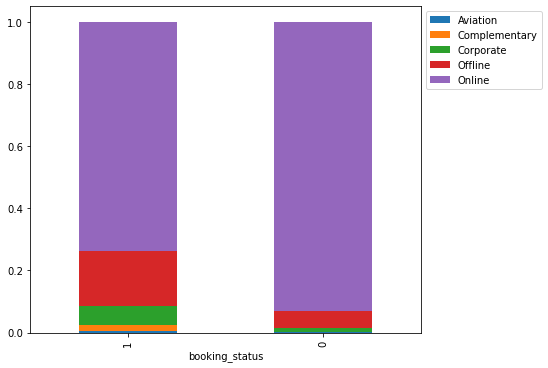

In [295]:
stacked_barplot(df, "booking_status", "market_segment_type")

The number of booking that is done thru online has a higher percentage of cancellation than booking done thru offline methods.Corporate booking were a little less prone to cancellations. Complementary rooms were less prone to booking cancellations.

room_type_reserved  Room_Type 1  Room_Type 2  Room_Type 3  Room_Type 4  \
booking_status                                                           
All                       29730          718            6         9369   
1                         20505          444            4         5686   
0                          9225          274            2         3683   

room_type_reserved  Room_Type 5  Room_Type 6  Room_Type 7    All  
booking_status                                                    
All                         906         1540          307  42576  
1                           539          714          197  28089  
0                           367          826          110  14487  
------------------------------------------------------------------------------------------------------------------------


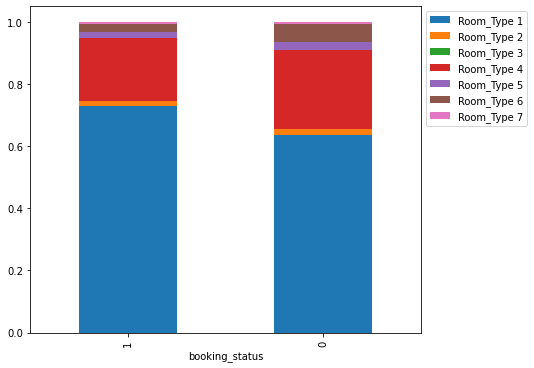

In [296]:
stacked_barplot(df, "booking_status", "room_type_reserved")

In [497]:
pd.crosstab(df.booking_status,df.room_type_reserved,margins=True)

room_type_reserved,Room_Type 1,Room_Type 2,Room_Type 3,Room_Type 4,Room_Type 5,Room_Type 6,Room_Type 7,All
booking_status,,,,,,,,
0,9225,274,2,3683,367,826,110,14487
1,20505,444,4,5686,539,714,197,28089
All,29730,718,6,9369,906,1540,307,42576


### Room_type1 had the highest number of cancellations. The second highest was room_type_4. These room types seem popular, 66% that have booked room_type1 and 60% that booked room type 4 have not cancelled.

no_of_previous_cancellations      0    1   2   3   4   5   6  11  13    All
booking_status                                                             
0                             14477    8   0   1   0   0   0   0   1  14487
All                           42132  249  66  47  24  16  16  25   1  42576
1                             27655  241  66  46  24  16  16  25   0  28089
------------------------------------------------------------------------------------------------------------------------


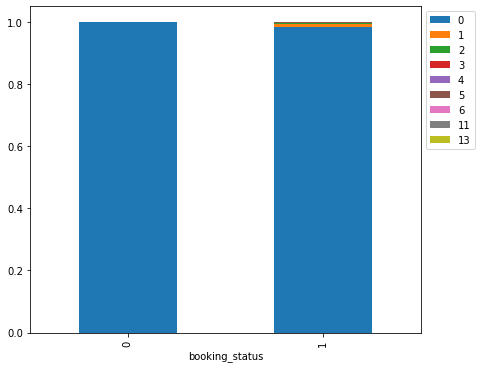

In [498]:
 stacked_barplot(df, "booking_status", "no_of_previous_cancellations")

We are looking at booking_status and the previously no.of cancellations. Does not show much significance on the cancellations.

repeated_guest      0     1    All
booking_status                    
All             41261  1315  42576
1               26784  1305  28089
0               14477    10  14487
------------------------------------------------------------------------------------------------------------------------


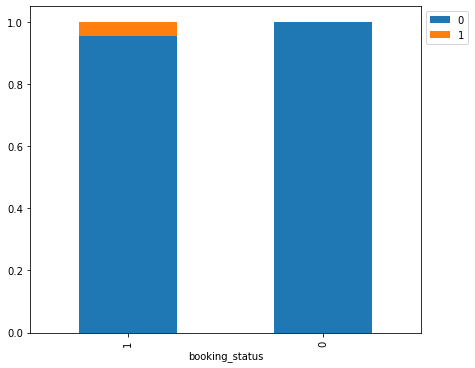

In [310]:
 stacked_barplot(df, "booking_status", "repeated_guest")

We are trying to see if booking_status has some relationship with repeat_guests.It does appear that people who stayed before have much lower cancellations than people coming in for the first time.

arrival_year    2017   2018   2019    All
booking_status                           
All             3893  22107  16576  42576
1               3417  15141   9531  28089
0                476   6966   7045  14487
------------------------------------------------------------------------------------------------------------------------


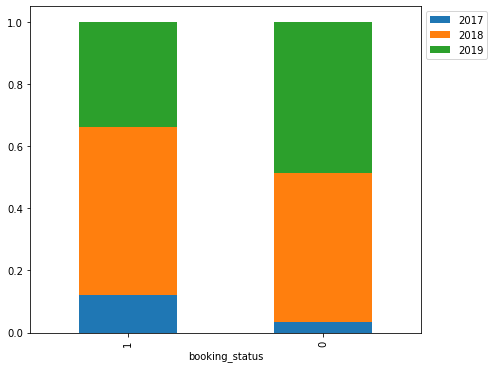

In [311]:
 stacked_barplot(df, "booking_status","arrival_year")

This comparision shows that we had most cancellations in 2019 followed by 2018. 2017 saw the fewest cancellations.

no_of_weekend_nights      0      1      2    3    4   5   6  7  8    All
booking_status                                                          
0                      5630   4130   4417  117  148  21  21  1  2  14487
All                   17829  12260  11987  220  216  30  31  1  2  42576
1                     12199   8130   7570  103   68   9  10  0  0  28089
------------------------------------------------------------------------------------------------------------------------


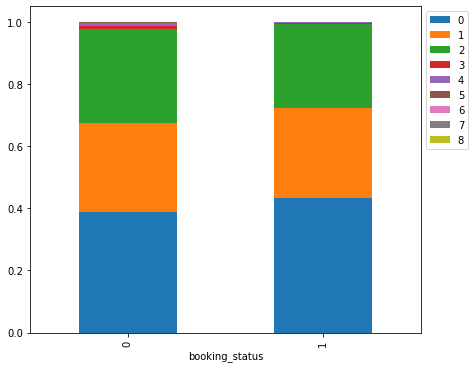

In [312]:
 stacked_barplot(df, "booking_status","no_of_weekend_nights")

This stacked bar plot does not show a huge significance of no_of_weekend_nights on booking_status.

no_of_special_requests      0      1     2     3    4   5    All
booking_status                                                  
1                       10476  11225  4992  1230  150  16  28089
All                     19228  15571  6381  1230  150  16  42576
0                        8752   4346  1389     0    0   0  14487
------------------------------------------------------------------------------------------------------------------------


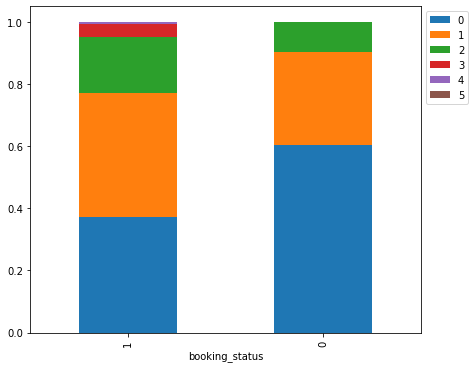

In [490]:
stacked_barplot(df, "booking_status","no_of_special_requests")

#### Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

In [491]:
 pd.crosstab(df.no_of_special_requests,df.booking_status,margins=True)

booking_status,0,1,All
no_of_special_requests,,,
0,8752,10476,19228
1,4346,11225,15571
2,1389,4992,6381
3,0,1230,1230
4,0,150,150
5,0,16,16
All,14487,28089,42576


#### This stacked bar plot does show that the more no. of special requests the guests make the probability of them keeping the booking is higher.Guests who made 1 or more special requests kept the booking. The crosstab shows that 72% of the guests who had atlest 1 special request kept their booking.

### Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

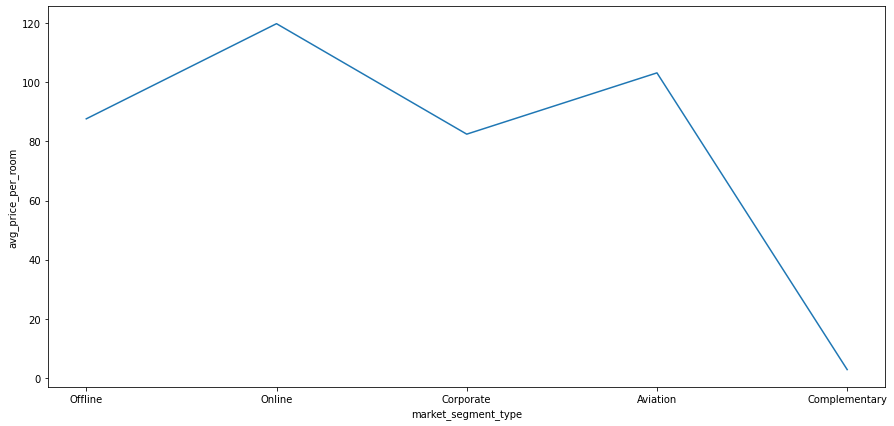

In [314]:
plt.figure(figsize=(15, 7))
sns.lineplot(x="market_segment_type", y="avg_price_per_room", data=df, ci=None)
plt.show()

#### The above line plot shows complementry customer got very reduced prices.Corporate also had some discounts. Online prices were the highest around 112 average price per room.Aviation booking also show 100+ cost per room on average.

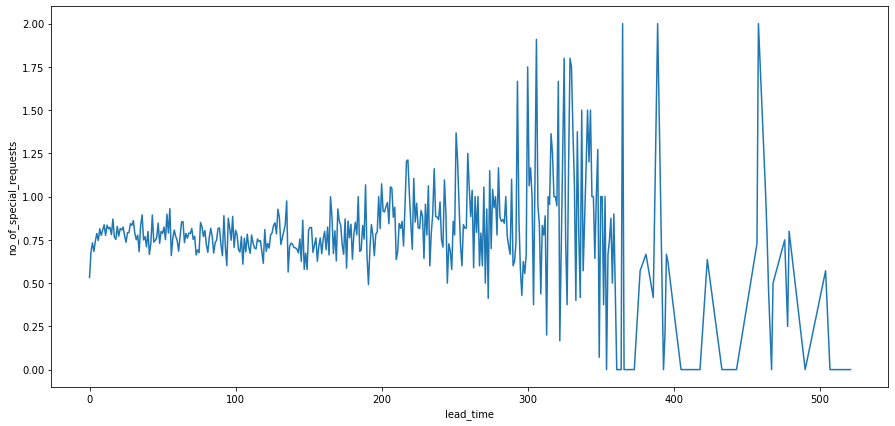

In [315]:
# Line plot compare lead_time and booking_status
plt.figure(figsize=(15, 7))
sns.lineplot(x="lead_time", y="no_of_special_requests", data=df, ci=None)
plt.show()

### Observations
This shows that when the lead_time was higher than 100 days the no._of_special_requests were higher than less than 100 days. This could mean people who book well in advance and have more than one special requests made are more likely to keep the booking.

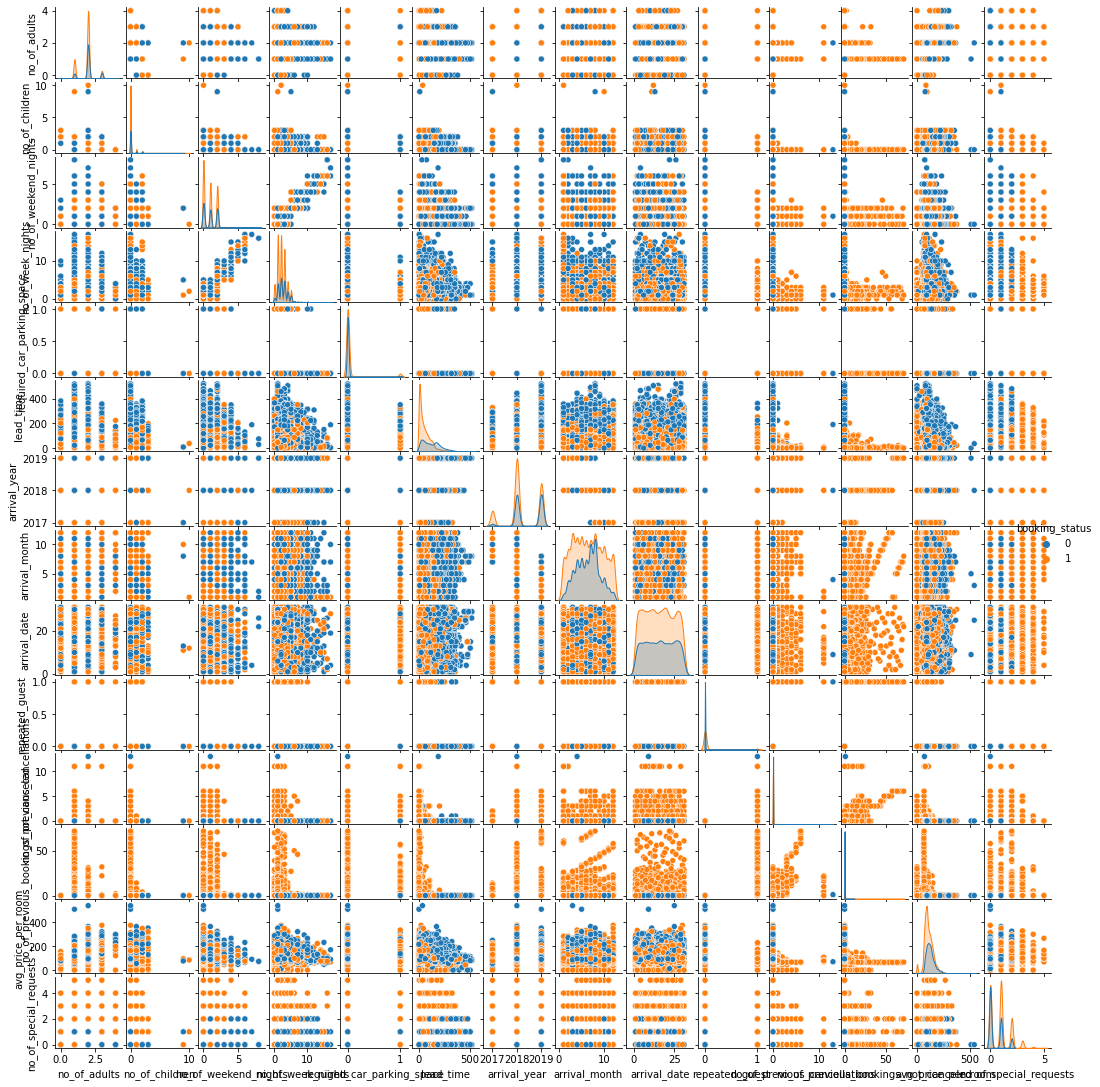

In [155]:
#plt.figure(figsize=(25,20))
#sns.pairplot(df, hue="avg_price_per_room")

g=sns.pairplot(df,hue="booking_status")
g.fig.set_size_inches(15,15)

In [ ]:
The pair plot We can see varying distributions in variables for booking_status
, we should investigate it further.

### Bivariate Analysis

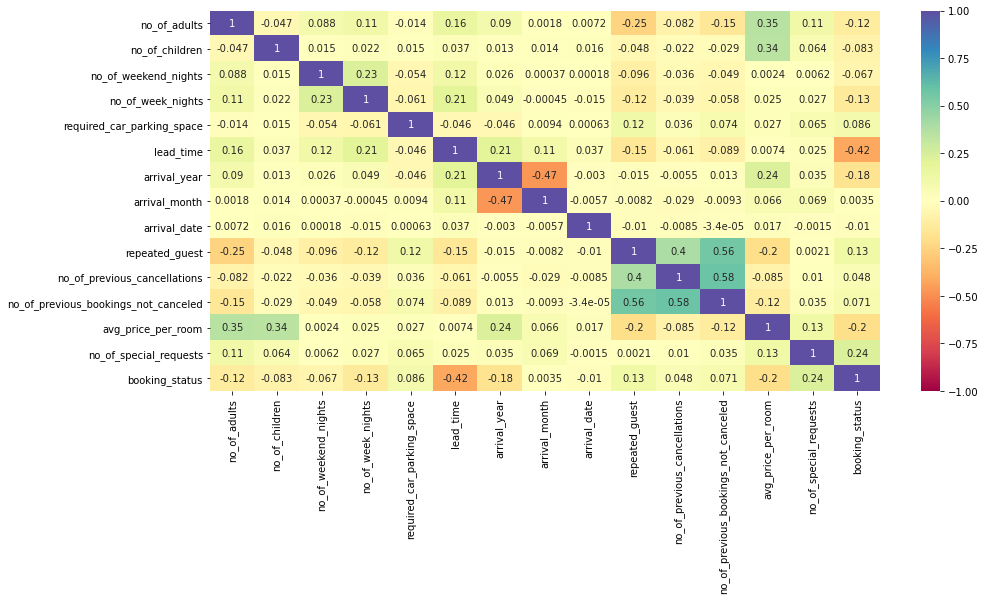

In [316]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap="Spectral")
plt.show()

### Observations

1. No_of_previous_booking_not_cancelled is showing some co-relation (0.58) no_of_previous_cancellations.
2. No_of_previous_booking_not_cancelled showing some co-relation (0.56) with repeated guest.
3. The other variables does not show a high co-relation with each other according to the heat map.

In [514]:
n_true = len(df.loc[df['booking_status'] == 0])
n_false = len(df.loc[df['booking_status'] == 1])
print("Number of cancelled cases: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of Not cancelled cases: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of cancelled cases: 14487 (34.03%)
Number of Not cancelled cases: 28089 (65.97%)


In [515]:
cat_vars = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type','booking_status'
           ]
# the other categorical variables have lots of levels
# and I wouldn't dummy encode them as such

for colname in cat_vars:
    df[colname] = df[colname].astype('category')
    
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42576 entries, 0 to 56924
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_adults                          42576 non-null  int64   
 1   no_of_children                        42576 non-null  int64   
 2   no_of_weekend_nights                  42576 non-null  int64   
 3   no_of_week_nights                     42576 non-null  int64   
 4   type_of_meal_plan                     42576 non-null  category
 5   required_car_parking_space            42576 non-null  int64   
 6   room_type_reserved                    42576 non-null  category
 7   lead_time                             42576 non-null  int64   
 8   arrival_year                          42576 non-null  int64   
 9   arrival_month                         42576 non-null  int64   
 10  arrival_date                          42576 non-null  int64   
 11  ma

In [319]:
df["type_of_meal_plan"].unique()

['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3']
Categories (4, object): ['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3']

In [320]:
df["room_type_reserved"].unique()

['Room_Type 1', 'Room_Type 4', 'Room_Type 6', 'Room_Type 5', 'Room_Type 2', 'Room_Type 7', 'Room_Type 3']
Categories (7, object): ['Room_Type 1', 'Room_Type 4', 'Room_Type 6', 'Room_Type 5', 'Room_Type 2', 'Room_Type 7', 'Room_Type 3']

In [321]:
df["market_segment_type"].unique()

['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary']
Categories (5, object): ['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary']

In [322]:
df["booking_status"].unique()

[1, 0]
Categories (2, int64): [1, 0]

In [323]:
 df["booking_status"] = df["booking_status"].astype('int64')

Casting The column as an int variable so we can have a 0 and 1 transformation.

## Data Pre-processing

In [516]:
#log transformation for new_price /used_price/screen_size and weight.
# Do outlier treatment for screen_size, weight, new_price
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    df: data frame
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [517]:
num_vars = ['lead_time','avg_price_per_room']
df_new = treat_outliers_all(df, num_vars)

In [518]:
X = df_new.drop(["booking_status"], axis=1)
y = df_new["booking_status"]

In [519]:
# encoding the categorical variables
X = pd.get_dummies(X, drop_first=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42576 entries, 0 to 56924
Data columns (total 27 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          42576 non-null  int64  
 1   no_of_children                        42576 non-null  int64  
 2   no_of_weekend_nights                  42576 non-null  int64  
 3   no_of_week_nights                     42576 non-null  int64  
 4   required_car_parking_space            42576 non-null  int64  
 5   lead_time                             42576 non-null  int64  
 6   arrival_year                          42576 non-null  int64  
 7   arrival_month                         42576 non-null  int64  
 8   arrival_date                          42576 non-null  int64  
 9   repeated_guest                        42576 non-null  int64  
 10  no_of_previous_cancellations          42576 non-null  int64  
 11  no_of_previous_

### EDA after treating outliers 
Let us run EDA after outlier treatment

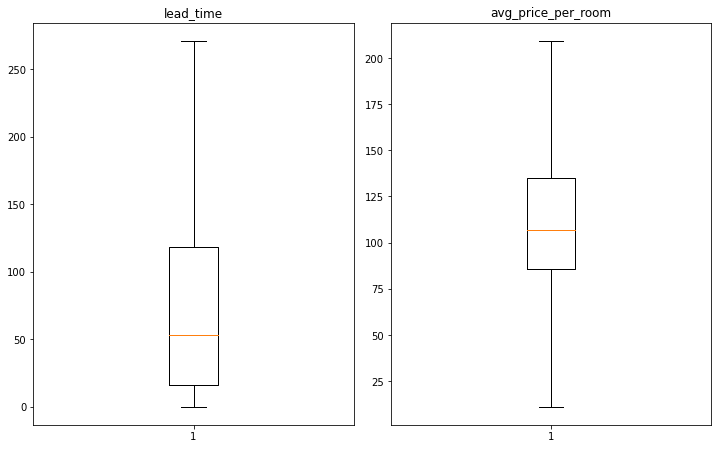

In [520]:
# let's look at the boxplots to see if the outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(num_vars):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df_new[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

#### Observation
There are no outliers for these variable avg_price_per_room and lead_time.

In [521]:
 pd.crosstab(df_new.lead_time,df_new.booking_status,margins=True)

booking_status,0,1,All
lead_time,,,
0,79,1518,1597
1,55,1182,1237
2,45,715,760
3,70,694,764
4,68,694,762
...,...,...,...
268,15,4,19
269,10,10,20
270,23,13,36


#### Observation this crosstab shows that 95% of the guests that had 1 day lead_time or less kept the booking.

In [522]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [523]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
1    0.661074
0    0.338926
Name: booking_status, dtype: float64
Percentage of classes in test set:
1    0.656619
0    0.343381
Name: booking_status, dtype: float64


Same kind of percentage for Training and testing data

In [524]:
#Making sure the data is dummied out correctly
X.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,224,2017,10,2,0,0,0,65.00,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2,0,2,3,0,5,2018,11,6,0,0,0,106.68,1,0,0,1,0,0,0,0,0,0,0,0,0,1
2,1,0,2,1,0,1,2018,2,28,0,0,0,60.00,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2,0,0,2,0,211,2018,5,20,0,0,0,100.00,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,3,0,0,3,0,271,2019,7,13,0,0,0,89.10,2,0,0,1,0,0,0,0,0,0,0,0,0,1


### Checking Multicollinearity

In [525]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [526]:
checking_vif(X_train)

,feature,VIF
0,no_of_adults,20.522462
1,no_of_children,2.272428
2,no_of_weekend_nights,2.190637
3,no_of_week_nights,3.772670
4,required_car_parking_space,1.069190
5,lead_time,2.433474
6,arrival_year,248.571003
7,arrival_month,5.612671
8,arrival_date,4.169466
9,repeated_guest,2.074719


#### Dropping columns that are high VIF > 10.


In [527]:
X = X.drop(["arrival_year"], axis=1)
X.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,224,10,2,0,0,0,65.00,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2,0,2,3,0,5,11,6,0,0,0,106.68,1,0,0,1,0,0,0,0,0,0,0,0,0,1
2,1,0,2,1,0,1,2,28,0,0,0,60.00,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2,0,0,2,0,211,5,20,0,0,0,100.00,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,3,0,0,3,0,271,7,13,0,0,0,89.10,2,0,0,1,0,0,0,0,0,0,0,0,0,1


In [528]:
X = X.drop(["avg_price_per_room"], axis=1)

In [529]:
X = X.drop(["market_segment_type_Online"], axis=1)

In [530]:
X = X.drop(["market_segment_type_Offline"], axis=1)

In [531]:
X = X.drop(["market_segment_type_Corporate"], axis=1)

In [532]:
X = X.drop(["market_segment_type_Complementary"], axis=1)

In [533]:
X = X.drop(["no_of_adults"], axis=1)

In [534]:
X.head()

,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7
0,0,1,2,0,224,10,2,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,2,3,0,5,11,6,0,0,0,1,0,0,1,0,0,0,0,0,0
2,0,2,1,0,1,2,28,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,2,0,211,5,20,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,3,0,271,7,13,0,0,0,2,0,0,1,0,0,0,0,0,0


In [535]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### Checking VIF to make sure values > 10 are indeed dropped.

In [536]:
import statsmodels.api as sm
# initial list of columns
cols = X_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = X_train[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
        print("feature_with_p_max= ",feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

feature_with_p_max=  room_type_reserved_Room_Type 3
feature_with_p_max=  room_type_reserved_Room_Type 5
feature_with_p_max=  type_of_meal_plan_Meal Plan 3
feature_with_p_max=  room_type_reserved_Room_Type 4
['no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7']


## Building a OLS Regression model

In [537]:
x_train2 = X_train[selected_features]
x_test2 = X_test[selected_features]

In [538]:
olsmod = sm.OLS(y_train, x_train2).fit()
print(olsmod.summary())

                                 OLS Regression Results                                
Dep. Variable:         booking_status   R-squared (uncentered):                   0.682
Model:                            OLS   Adj. R-squared (uncentered):              0.682
Method:                 Least Squares   F-statistic:                              3995.
Date:                Fri, 22 Oct 2021   Prob (F-statistic):                        0.00
Time:                        18:32:36   Log-Likelihood:                         -19043.
No. Observations:               29803   AIC:                                  3.812e+04
Df Residuals:                   29787   BIC:                                  3.825e+04
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                                           coef    std err          t      P>|t|      [0.025      0.975]
---------------

### Observations
Now adjusted R-squared is 0.682, i.e., our model is able to explain ~68% of the variance. This shows that the model is not so good. This shows that we need to do Logistic regression to arrive at a solution.

## Building a Logistic Regression Model with Decision Tree

In [539]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 29803
Number of rows in test data = 12773


In [540]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
1    0.661074
0    0.338926
Name: booking_status, dtype: float64
Percentage of classes in test set:
1    0.656619
0    0.343381
Name: booking_status, dtype: float64


#### Making Functions to calculate

In [541]:
##  Function to calculate recall score
def get_recall_score(model, predictors, target):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable
    
    """
    prediction = model.predict(predictors)
    return recall_score(target, prediction)

In [542]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [543]:
model = DecisionTreeClassifier(criterion="gini",class_weight={0: 0.66, 1: 0.34}, random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.66, 1: 0.34}, random_state=1)

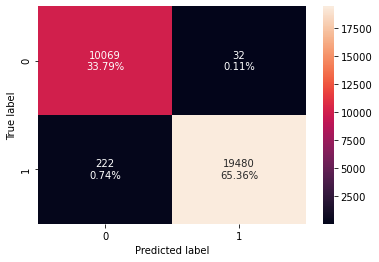

In [544]:
 confusion_matrix_sklearn(model, X_train, y_train)

### Observation
1. TP-- booking that will not cancel.65%
2. TN-- booking that will cancel.34%
3. FP--- bookings that you predict will cancel but does not cancel.11%
4. FN--- Booking that you do not predict will cancel but they cancel.0.74% so here reducing the FN is very important. so recall should be maximized.

In [545]:
decision_tree_perf_train = get_recall_score(model, X_train, y_train)
#print(model)

print("Recall Score:", decision_tree_perf_train)

Recall Score: 0.9887321084153893


In [546]:
decision_tree_perf_test = get_recall_score(model, X_test, y_test)
#print(model)

print("Recall Score:", decision_tree_perf_train)

Recall Score: 0.9887321084153893


### Observations
Model is able to  classify all the data points on the training set.
FP--- bookings that you predict will cancel but does not cancel.0.11%
FN--- Booking that you do not predict will cancel but they cancel.0.74%

As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.

This generally leads to overfitting of the model as Decision Tree will perform well on the training set but will fail to replicate the performance on the test set.

In [547]:
column_names = list(X.columns)
feature_names = column_names
print(feature_names)

['no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7']


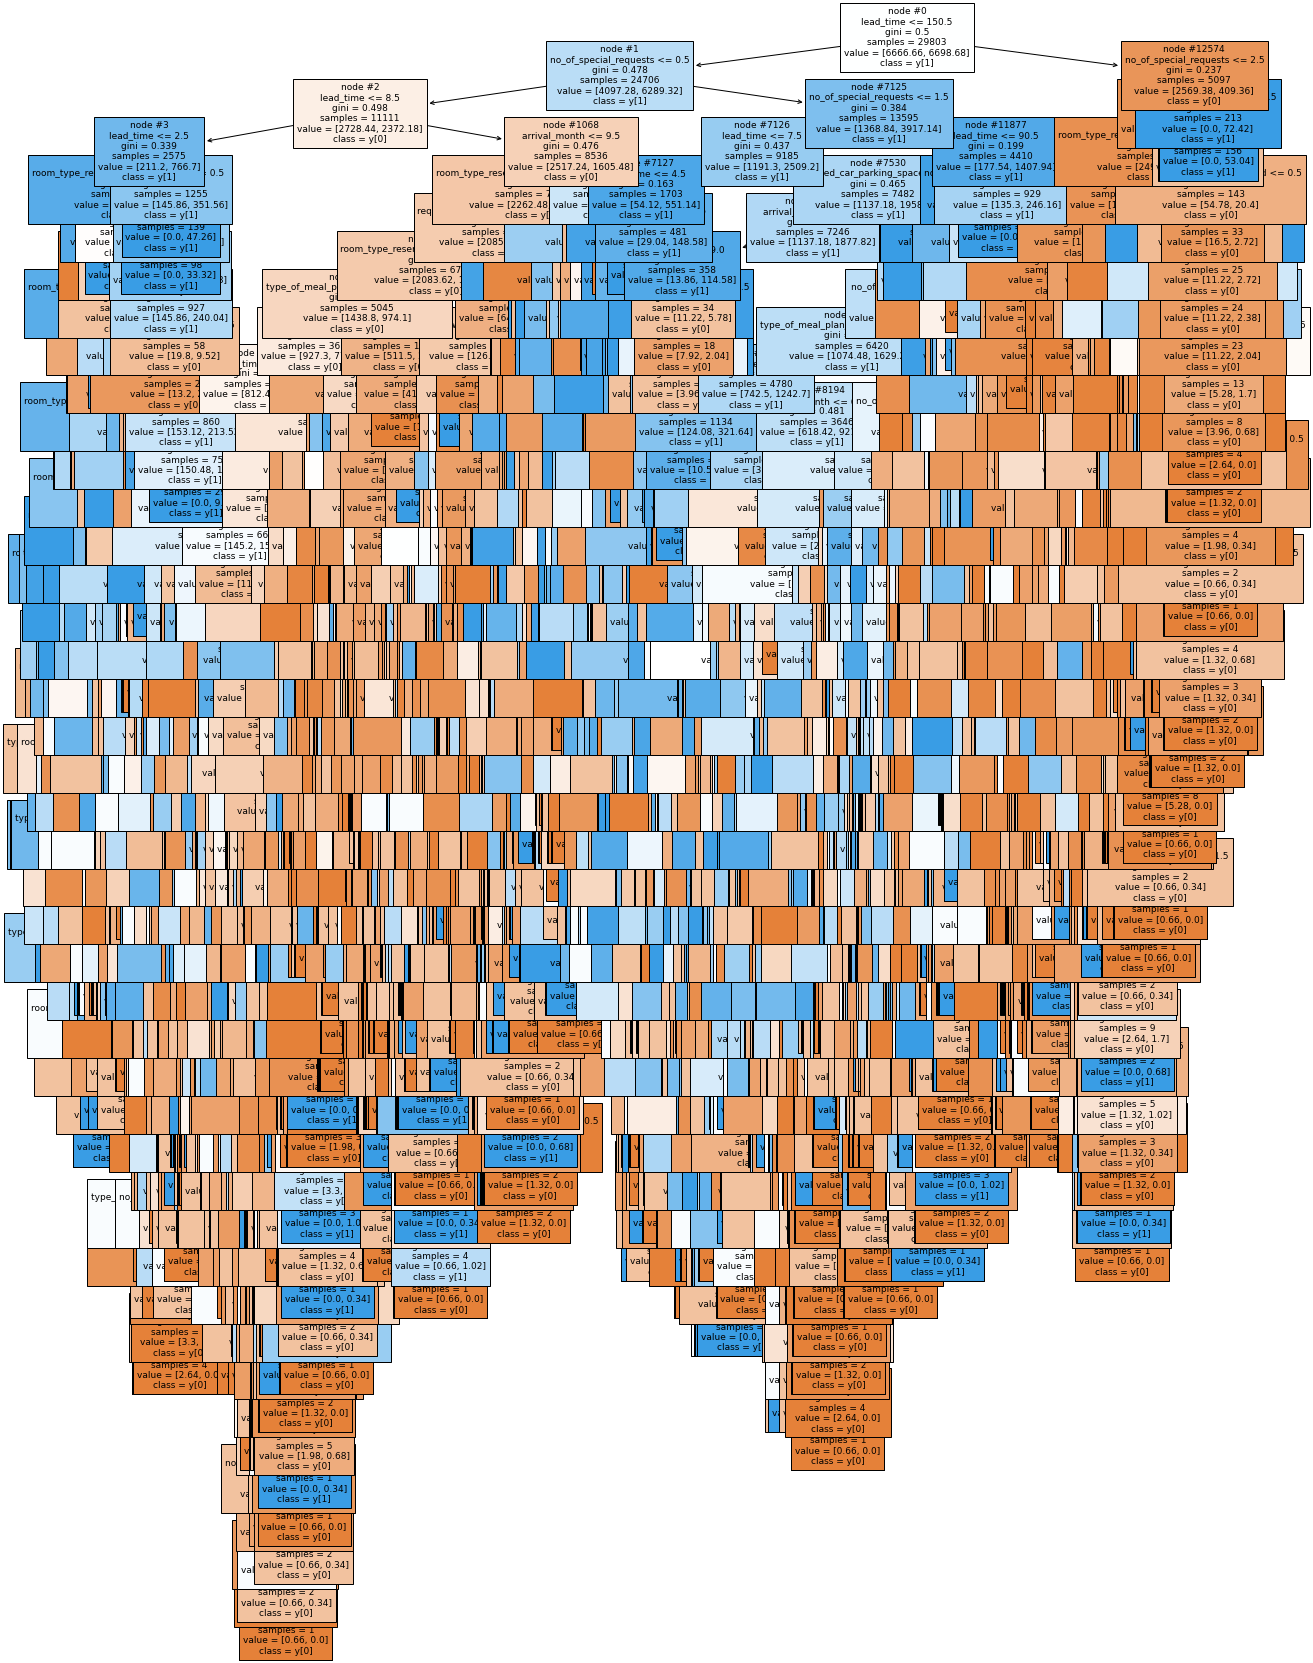

In [548]:
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [549]:
print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                           Imp
lead_time                             0.446724
arrival_date                          0.156001
no_of_special_requests                0.098871
arrival_month                         0.095961
no_of_week_nights                     0.075535
no_of_weekend_nights                  0.045588
type_of_meal_plan_Not Selected        0.014810
no_of_children                        0.013172
room_type_reserved_Room_Type 4        0.012585
required_car_parking_space            0.009097
type_of_meal_plan_Meal Plan 2         0.008674
room_type_reserved_Room_Type 6        0.007608
room_type_reserved_Room_Type 5        0.005051
repeated_guest                        0.003829
room_type_reserved_Room_Type 7        0.002838
room_type_reserved_Room_Type 2        0.002786
no_of_previous_bookings_not_canceled  0.000580
no_of_previous_cancellations          0.000229
room_type_reserved_Room_Type 3        0.000061
type_of_meal_plan_Meal Plan 3         0.000000


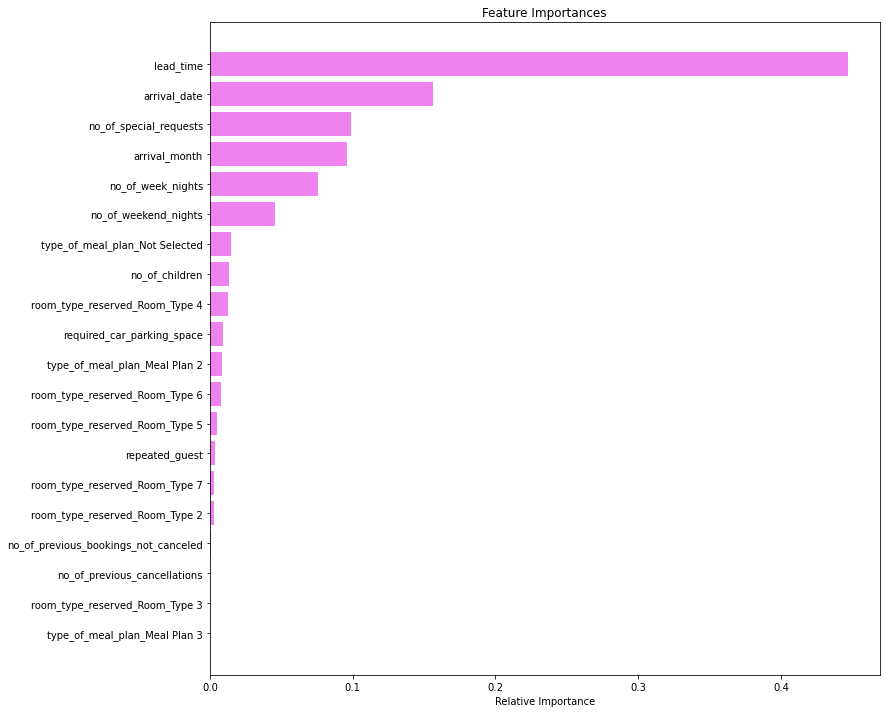

In [550]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [420]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 150.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- lead_time <= 8.50
|   |   |   |--- lead_time <= 2.50
|   |   |   |   |--- room_type_reserved_Room_Type 6 <= 0.50
|   |   |   |   |   |--- no_of_week_nights <= 8.50
|   |   |   |   |   |   |--- repeated_guest <= 0.50
|   |   |   |   |   |   |   |--- room_type_reserved_Room_Type 7 <= 0.50
|   |   |   |   |   |   |   |   |--- arrival_month <= 1.50
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 43.52] class: 1
|   |   |   |   |   |   |   |   |--- arrival_month >  1.50
|   |   |   |   |   |   |   |   |   |--- arrival_month <= 8.50
|   |   |   |   |   |   |   |   |   |   |--- room_type_reserved_Room_Type 5 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 19
|   |   |   |   |   |   |   |   |   |   |--- room_type_reserved_Room_Type 5 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |--- arrival_month > 

### Reducing over fitting (Pre-Pruning)
Using GridSearch for Hyperparameter tuning of our tree model
Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.

In [551]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.66, 1: 0.34})
#, class_weight={"balanced"}
# Grid of parameters to choose from
parameters = {
    "max_depth": [5, 10, 15, None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.66, 1: 0.34}, criterion='entropy',
                       min_impurity_decrease=1e-05, random_state=1)

### Checking performance of the training set

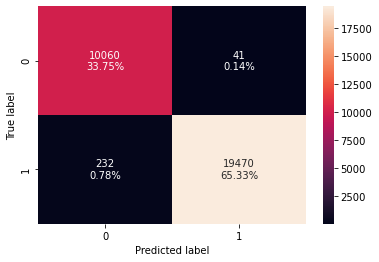

In [552]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [553]:
decision_tree_tune_perf_train = get_recall_score(estimator, X_train, y_train)
print("Recall Score:", decision_tree_tune_perf_train)

Recall Score: 0.9882245457313978


### Checking performance of the test data

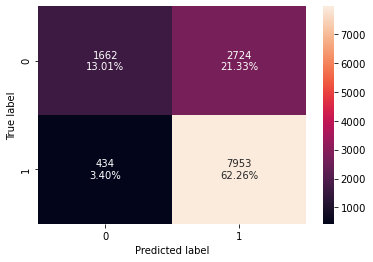

In [425]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [554]:
decision_tree_tune_perf_test = get_recall_score(estimator, X_test, y_test)
print("Recall Score:", decision_tree_tune_perf_test)

Recall Score: 0.7992130678430905


### The model is now giving generalised results.

#### Visualizing the Decision Tree

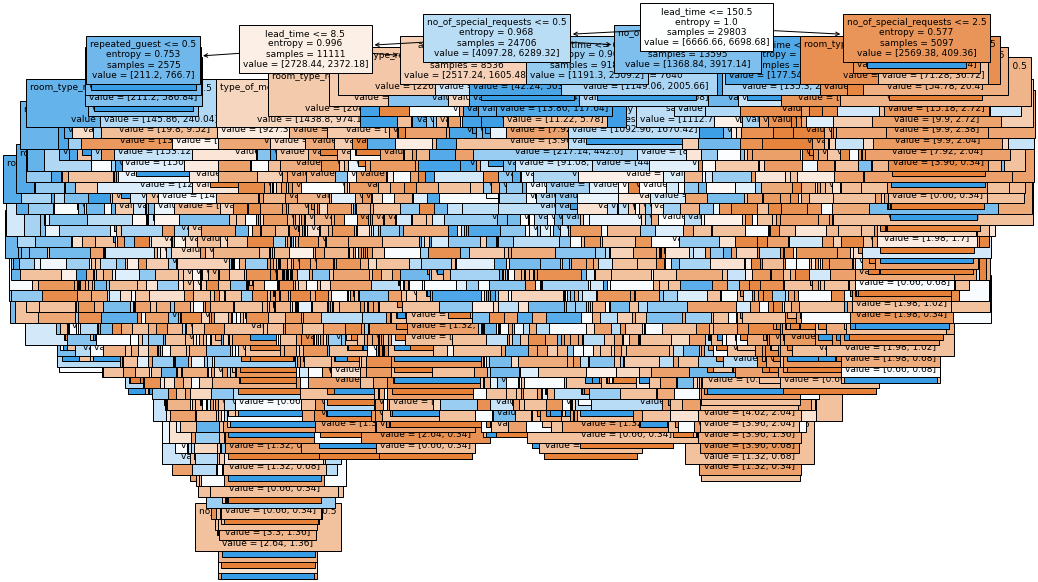

In [555]:
plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

#### Text version of the optimized tree

In [556]:
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 150.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- lead_time <= 8.50
|   |   |   |--- repeated_guest <= 0.50
|   |   |   |   |--- arrival_month <= 1.50
|   |   |   |   |   |--- weights: [0.00, 74.80] class: 1
|   |   |   |   |--- arrival_month >  1.50
|   |   |   |   |   |--- arrival_month <= 11.50
|   |   |   |   |   |   |--- lead_time <= 2.50
|   |   |   |   |   |   |   |--- room_type_reserved_Room_Type 6 <= 0.50
|   |   |   |   |   |   |   |   |--- arrival_month <= 8.50
|   |   |   |   |   |   |   |   |   |--- room_type_reserved_Room_Type 7 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- arrival_month <= 7.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 20
|   |   |   |   |   |   |   |   |   |   |--- arrival_month >  7.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 18
|   |   |   |   |   |   |   |   |   |--- room_type_reserved_Room_Type 7 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- 

In [557]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

# Here we will see that importance of features has increased

                                           Imp
lead_time                             0.414206
arrival_date                          0.169438
arrival_month                         0.099774
no_of_special_requests                0.087940
no_of_week_nights                     0.083786
no_of_weekend_nights                  0.051893
type_of_meal_plan_Not Selected        0.018751
room_type_reserved_Room_Type 4        0.017282
no_of_children                        0.015233
required_car_parking_space            0.009452
type_of_meal_plan_Meal Plan 2         0.007944
room_type_reserved_Room_Type 6        0.007913
repeated_guest                        0.006582
room_type_reserved_Room_Type 5        0.004366
room_type_reserved_Room_Type 2        0.002834
room_type_reserved_Room_Type 7        0.002262
no_of_previous_bookings_not_canceled  0.000179
no_of_previous_cancellations          0.000113
room_type_reserved_Room_Type 3        0.000053
type_of_meal_plan_Meal Plan 3         0.000000


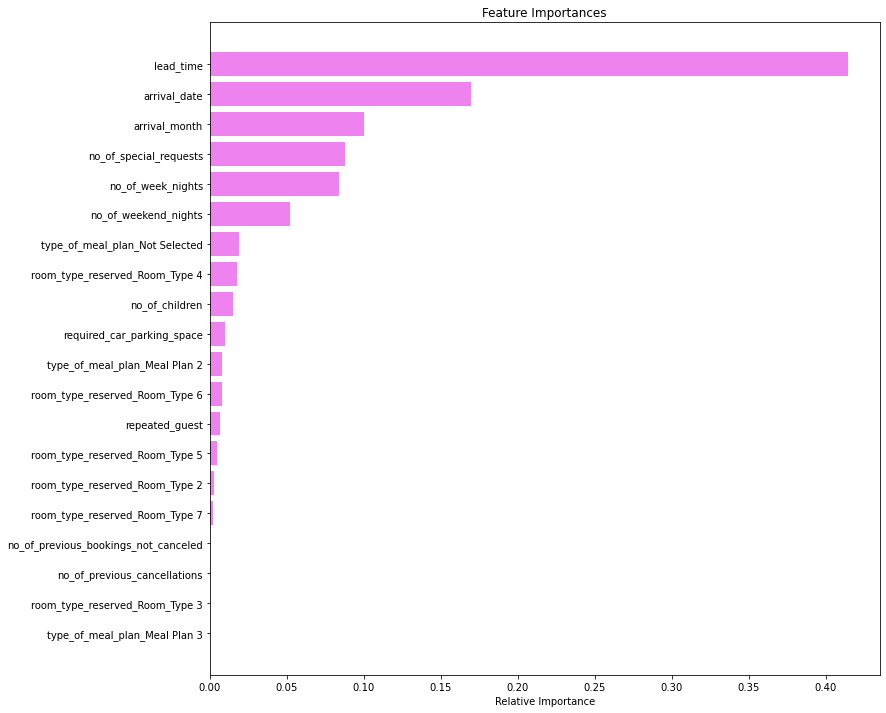

In [558]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Observation

In the tuned decision tree the lead time is the most important feature followed by the number of special request that are mde by the guests.

### Cost Complexity Pruning

#### Total impurity of leaves vs effective alphas of pruned

In [559]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [560]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.009358
1,0.000000,0.009358
2,0.000000,0.009358
3,0.000000,0.009358
4,0.000000,0.009358
...,...,...
2717,0.003672,0.331105
2718,0.008702,0.339807
2719,0.014055,0.353862
2720,0.019770,0.373632


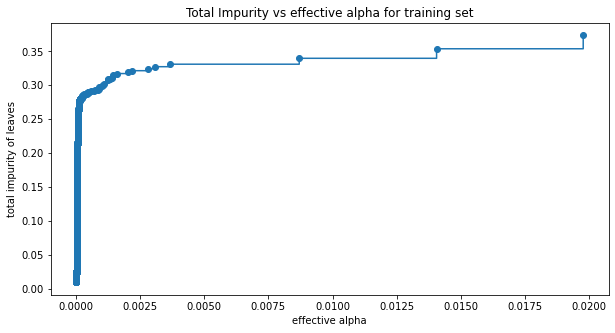

In [561]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [569]:
clfs = []

ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities
for ccp_alpha in ccp_alphas:    
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.07447795787334188


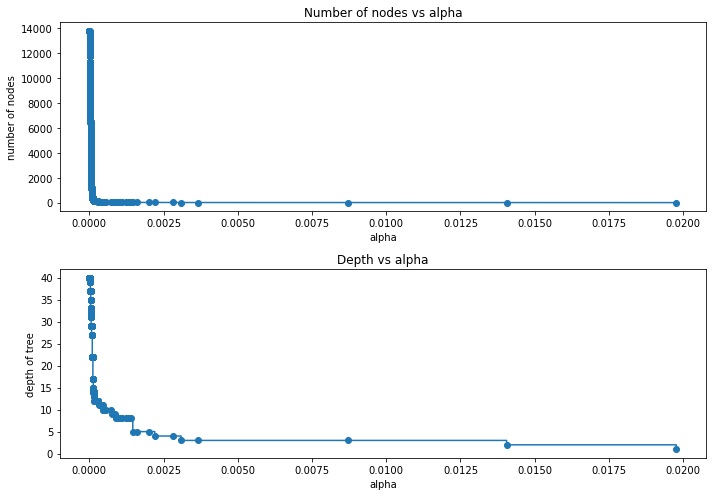

In [570]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [571]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [572]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [573]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

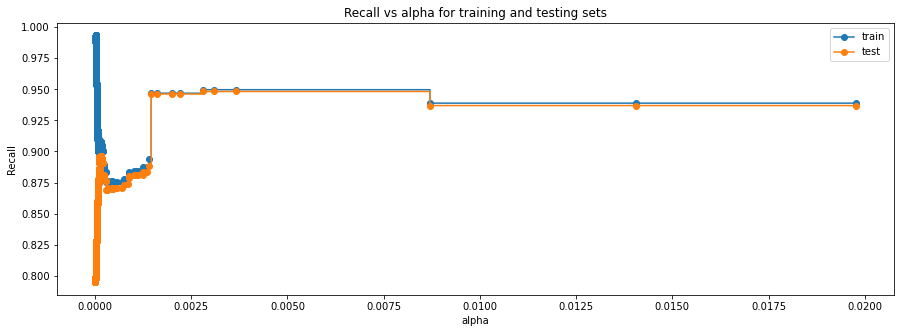

In [574]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

## Maximum value of Recall is at 0.02 alpha or higher , but if we choose decision tree will only have a root node and we would lose the buisness rules, instead we can choose alpha 0.0012 retaining information and getting higher recall.

In [575]:

index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0028160115953393267, random_state=1)


In [576]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0028160115953393267, random_state=1)

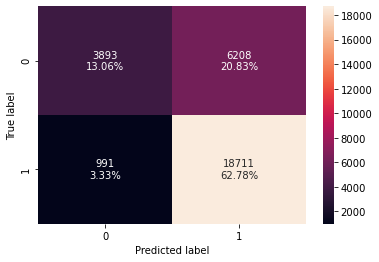

In [577]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [578]:
print("Recall Score:", get_recall_score(best_model, X_train, y_train))

Recall Score: 0.949700538016445


#### Checking performace on test

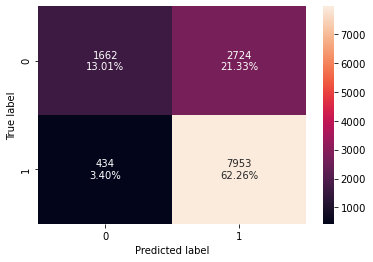

In [579]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [475]:
print("Recall Score:", get_recall_score(best_model, X_test, y_test))

Recall Score: 0.8066054608322404


### Visulazing decision tree

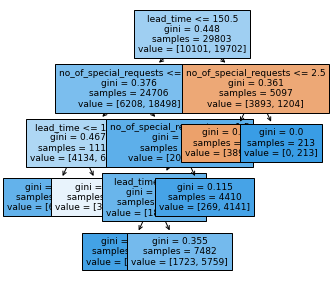

In [580]:
plt.figure(figsize=(5, 5))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

### Creating model with 0.0012 ccp_alpha

In [592]:
best_model2 = DecisionTreeClassifier(
    ccp_alpha=0.0012, class_weight={0: 0.66, 1: 0.34}, random_state=1
)
best_model2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0012, class_weight={0: 0.66, 1: 0.34},
                       random_state=1)

#### Checking performance on training set

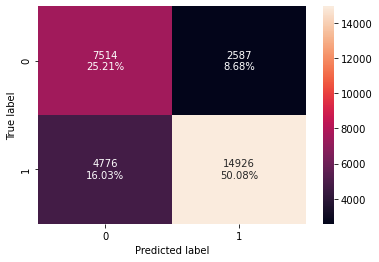

In [593]:
confusion_matrix_sklearn(best_model2, X_train, y_train)


In [594]:
decision_tree_postpruned_perf_train = get_recall_score(best_model2, X_train, y_train)
print("Recall Score:", decision_tree_postpruned_perf_train)


Recall Score: 0.7575880621256725


#### checking performance on test set

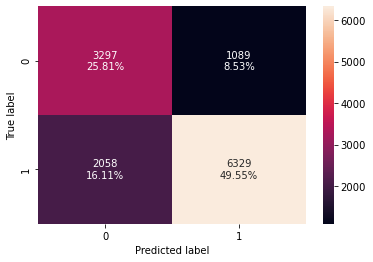

In [595]:
confusion_matrix_sklearn(best_model2, X_test, y_test)

In [596]:
decision_tree_postpruned_perf_test = get_recall_score(best_model2, X_test, y_test)
print("Recall Score:", decision_tree_postpruned_perf_test)

Recall Score: 0.7546202456182187


The results have improved from the initial model.
The performance is comparable to the hyperparameter tuned model.
The model is giving a generalized performance on training and test set.

### Visulazing the descision tree

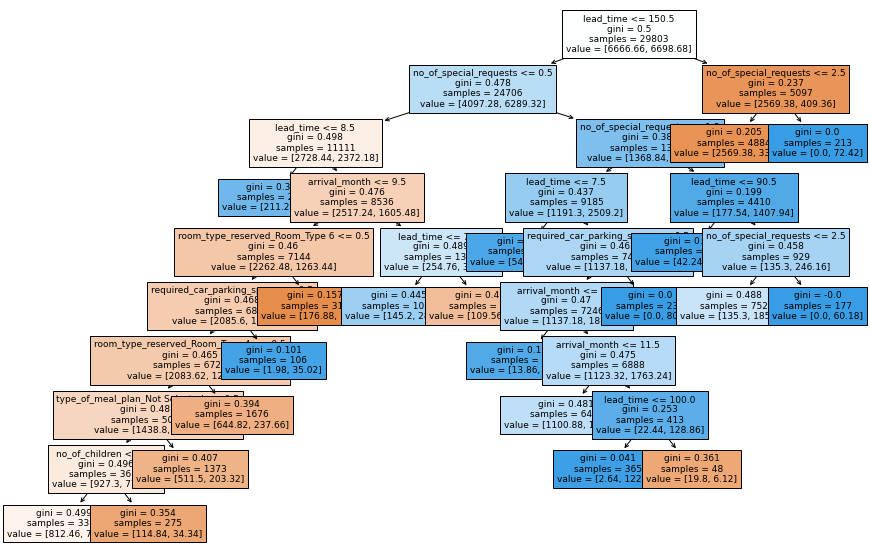

In [597]:
plt.figure(figsize=(15, 10))

out = tree.plot_tree(
    best_model2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

### Observation 
The model is giving generalised results

In [598]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                           Imp
lead_time                             0.629673
no_of_special_requests                0.270065
arrival_month                         0.036958
required_car_parking_space            0.020310
room_type_reserved_Room_Type 6        0.013188
type_of_meal_plan_Not Selected        0.012554
room_type_reserved_Room_Type 4        0.010140
no_of_children                        0.007112
no_of_previous_cancellations          0.000000
no_of_previous_bookings_not_canceled  0.000000
no_of_weekend_nights                  0.000000
type_of_meal_plan_Meal Plan 2         0.000000
type_of_meal_plan_Meal Plan 3         0.000000
repeated_guest                        0.000000
room_type_reserved_Room_Type 2        0.000000
room_type_reserved_Room_Type 3        0.000000
arrival_date                          0.000000
room_type_reserved_Room_Type 5        0.000000
no_of_week_nights                     0.000000
room_type_reserved_Room_Type 7        0.000000


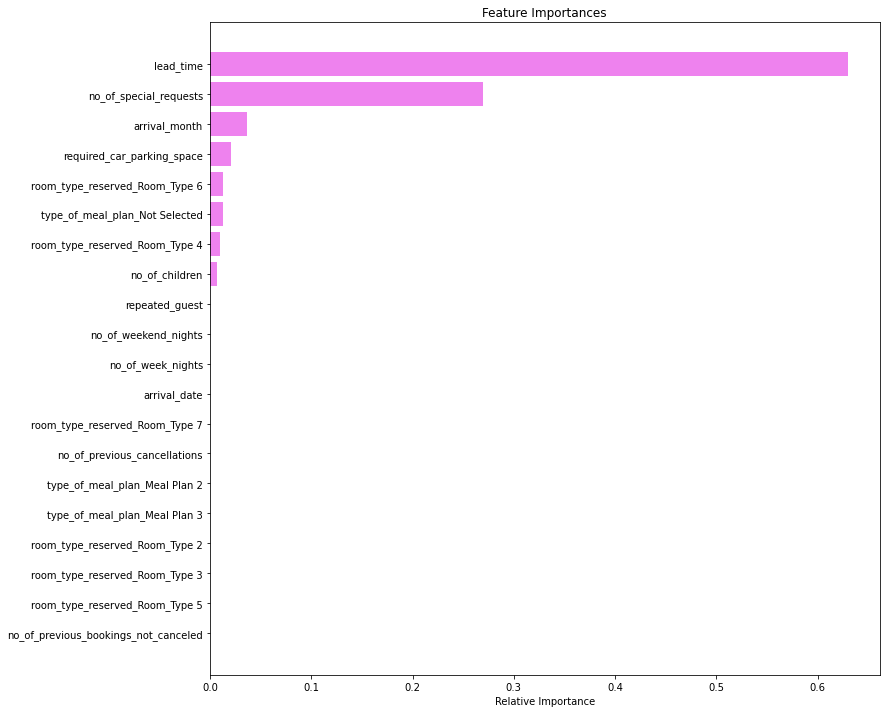

In [599]:
importances = best_model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [600]:
# training performance comparison

models_train_comp_df = pd.DataFrame(
    [
        decision_tree_perf_train,
        decision_tree_tune_perf_train,
        decision_tree_postpruned_perf_train,
    ],
    columns=["Recall on training set"],
)

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Recall on training set
0,0.988732
1,0.988225
2,0.757588


In [601]:
# testing performance comparison

models_test_comp_df = pd.DataFrame(
    [
        decision_tree_perf_test,
        decision_tree_tune_perf_test,
        decision_tree_postpruned_perf_test,
    ],
    columns=["Recall on testing set"],
)

print("Test performance comparison:")
models_test_comp_df


Test performance comparison:


,Recall on testing set
0,0.794563
1,0.799213
2,0.754620


### Observations
Decision tree model with pre-pruning has given the best recall score on training data and test data.
The pre-pruned and the post-pruned models have reduced overfitting and the model is giving a generalized performance.

## Conclusions and Recomendations

### Conclusions
1. We analyzed the "star hotels booking data" using different techniques and used Decision Tree Classifier to build a predictive model for the same.
2. The model built can be used to predict if a Guest is going to keep the booking or cancel the booking.
3. We visualized different trees and their confusion matrix to get a better understanding of the model. Easy interpretation is one of the key benefits of Decision Trees.

### Insights and Recommendations
1. Lead_time , No_of_special_requests and the room_type that is reserved is key to the prediction if the booking will be kept or cancelled.
2. 95% of the guests that had a lead_time of 1 day or less kept the booking.so the hotel making this attractive can gain guests that do not cancel.
3. It appears that guests who make 1 or more than 1 special request will keep their booking even if the lead_time for the booking was high.
4. The busiest month was august and next busiest was july. so the hotel could charge additional fees if guests cancelled booking during the busy months. This would contribute to the revenue of the hotel.
5. Hotel should encourage guests to come back and be repeat guests. The data shows 99% of them kept their booking. By providing some incentives like free meal plan or discounted room prices the hotel can increase the booking percentage that are not cancelled.
6. The number of booking that is done thru online has a higher percentage of cancellation than booking done thru offline methods.Corporate booking were a little less prone to cancellations. Complementary rooms were less prone to booking cancellations.Offering a discount to coporation could get the star hotel to maintain a higher booking percentage that is not cancelled.
7. Another indicator of cancellation is the room type. Room_type_1 and Room_type_4 had a much higher number of guests who kept the booking than other room types.
